
# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. 
____
I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Getting the Data

In [28]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data

I need to get data using pandas datareader. I will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figuring out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Setting each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This involved a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions.**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

In [7]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [12]:
# Bank of America
BAC=data.DataReader('BAC',start='2006, 1, 1', end='2016, 1, 1',data_source='yahoo')
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.425114
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.059509
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.103382
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.052204
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.074108


In [14]:
# CityFroup
C=data.DataReader('C',start='2006, 1, 1', end='2016, 1, 1',data_source='yahoo')

# Goldman Sachs
GS=data.DataReader('GS',start='2006, 1, 1', end='2016, 1, 1',data_source='yahoo')

# JPMorgan Chase
JPM=data.DataReader('JPM',start='2006, 1, 1', end='2016, 1, 1',data_source='yahoo')

# Morgan Stanley
MS=data.DataReader('MS',start='2006, 1, 1', end='2016, 1, 1',data_source='yahoo')

# Wells Fargo
WFC=data.DataReader('WFC',start='2006, 1, 1', end='2016, 1, 1',data_source='yahoo')

In [15]:
MS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.786667
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,36.811905
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,36.912865
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,36.950710
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,37.341850
...,...,...,...,...,...,...
2015-12-24,32.709999,32.439999,32.570000,32.480000,2798200.0,28.555326
2015-12-28,32.360001,31.950001,32.360001,32.169998,5420300.0,28.282784
2015-12-29,32.700001,32.330002,32.439999,32.549999,6388200.0,28.616871


<b>** Creating a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**</b>

In [16]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

<b>** Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Setting the keys argument equal to the tickers list.**</b>

In [17]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis = 1, keys = tickers)

In [18]:
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.425114   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.059509   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.103382   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.052204   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.074108   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.574412   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.448163   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.583436   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.376013   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.177611   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.786667  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.811905  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.912865  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.950710  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.341850  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  28.555326  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  28.282784  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  28.616871  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  28.335531  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  27.966284  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.658106  
2006-01-04  31.530001  10870000.0  20.418499  
2006-01-05  31.495001  10158000.0  20.395836  
2006-01-06  31.680000   8403800.0  20.515644  
2006-01-09  31.674999   5619600.0  20.512400  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  46.234390  
2015-12-28  54.680000   8288800.0  46.116322  
2015-12-29  55.290001   7894900.0  46.630783  
2015-12-30  54.889999   8016900.0  46.293434  
2015-12-31  54.360001  10929800.0  45.846439  

[2517 rows

<b> Setting the column name levels :</b>

In [19]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [20]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.425114  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.059509  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.103382  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.052204  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.074108  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.786667  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.811905  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.912865  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.950710  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.341850  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.658106  
2006-01-04   31.799999  31.530001  10870000.0  20.418499  
2006-01-05   31.500000  31.495001  10158000.0  20.395836  
2006-01-06   31.580000  31.680000   8403800.0  20.515644  
2006-01-09   31.674999  31.674999   5619600.0  20.512400  

[5 rows x 36 columns]

<b> What is the max Close price for each bank's stock throughout the time period? </b>

In [21]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


In [23]:
bank_stocks.xs(key = 'Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

<b>Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:</b> 

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [24]:
returns = pd.DataFrame()

<b> Using pandas pct_change() method on the Close column to create a column representing this return value. Creating a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.</b>

In [25]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [26]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


<b> Creating a pairplot using seaborn of the returns dataframe. What stock stands out ? </b>

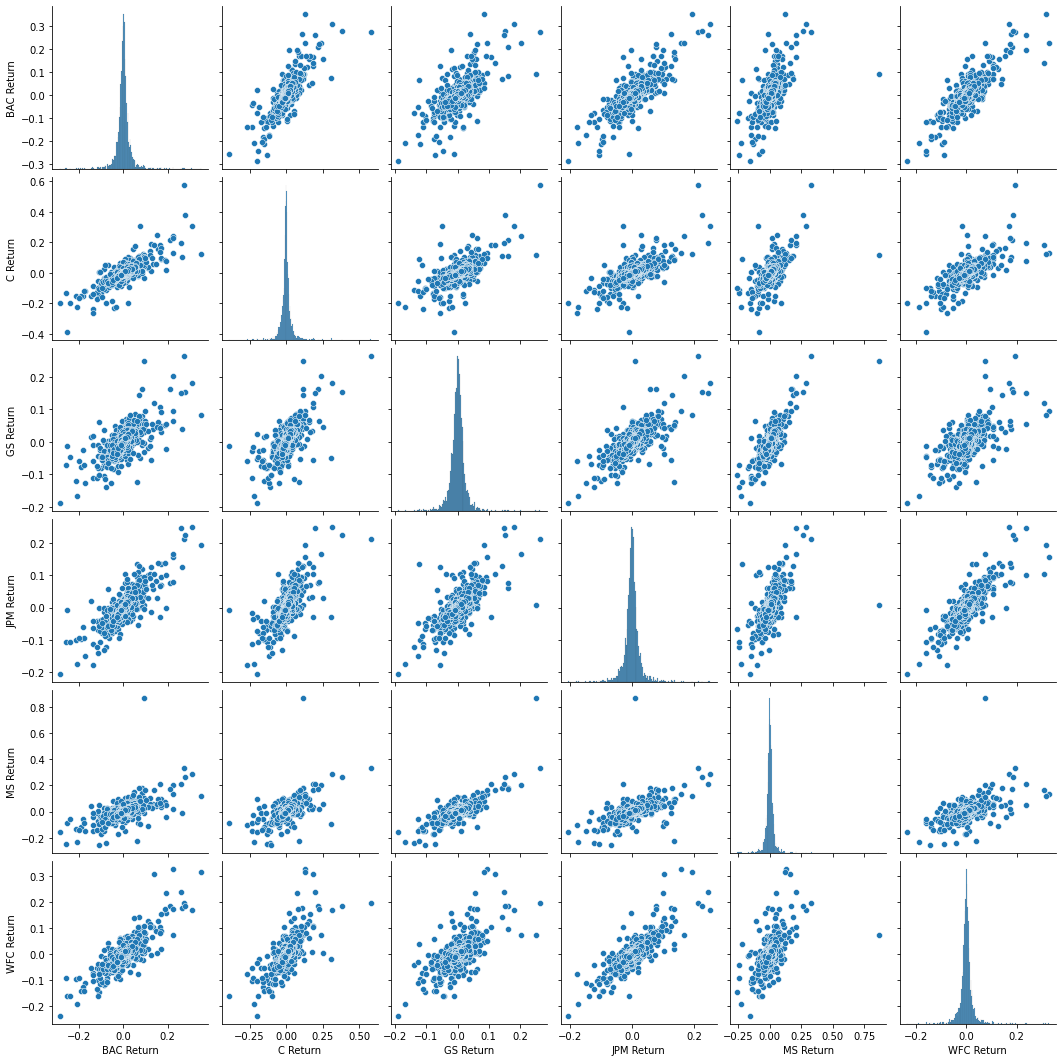

In [29]:
sns.pairplot(returns[1:])

<b> Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day? </b>

In [30]:
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [32]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [33]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

On <b>January 20, 2009</b> *Barack Obama* takes the oath of office as the 44th president of the United States.

<b> Taking a look at the standard deviation of the returns, which stock would be classified as the riskiest over the entire time period? Which would be classified as the riskiest for the year 2015?</b>

In [34]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [46]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

<b> Creating a distplot using seaborn of the 2015 returns for Morgan Stanley </b>

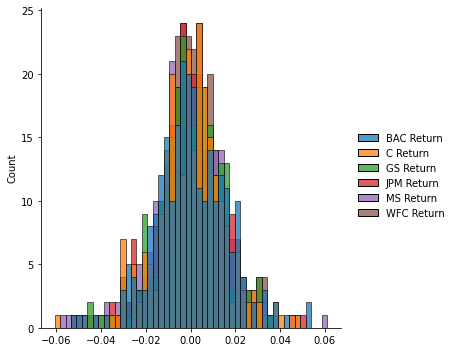

In [47]:
sns.displot(returns.loc['2015-01-01':'2015-12-31'],color = 'green',bins =50)

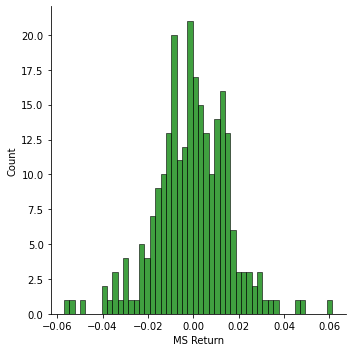

In [48]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color = 'green',bins =50)

<b> Creating a distplot using seaborn of the 2008 returns for CitiGroup </b>

<AxesSubplot:ylabel='Count'>

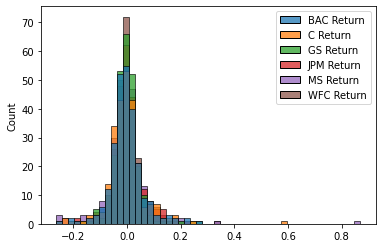

In [50]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31'], bins = 50)

<AxesSubplot:xlabel='C Return', ylabel='Count'>

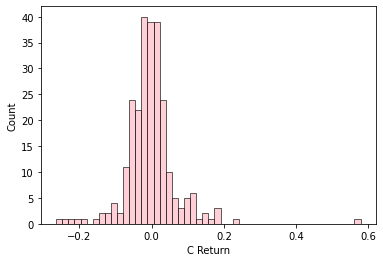

In [51]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='pink', bins = 50)

____
# More Visualization

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

 <b>Creating a line plot showing Close price for each bank for the entire index of time.</b> 

(Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

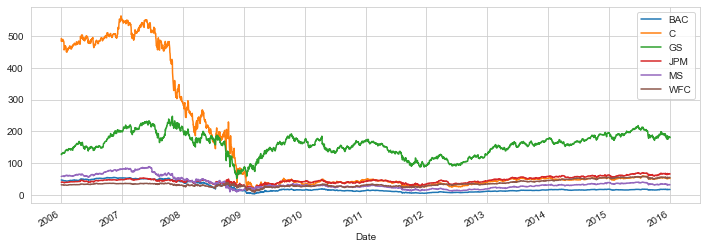

In [54]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label = tick, figsize=(12,4))
    
plt.legend()

In [57]:
bank_stocks.xs(key='Close', axis=1, level = 'Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...
2015-12-24,17.270000,52.709999,182.470001,66.599998,32.480000,54.820000
2015-12-28,17.129999,52.380001,181.619995,66.379997,32.169998,54.680000
2015-12-29,17.280001,52.980000,183.529999,67.070000,32.549999,55.290001


<AxesSubplot:xlabel='Date'>

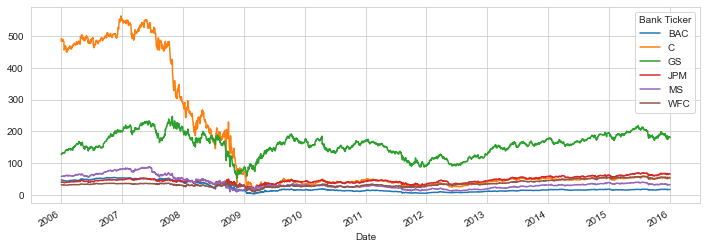

In [59]:
bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').plot(figsize=(12,4))

 ### With cufflinks ;

In [60]:
bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').iplot()

## Moving Averages

Analyzing the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [61]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.425114
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.059509
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.103382
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.052204
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.074108


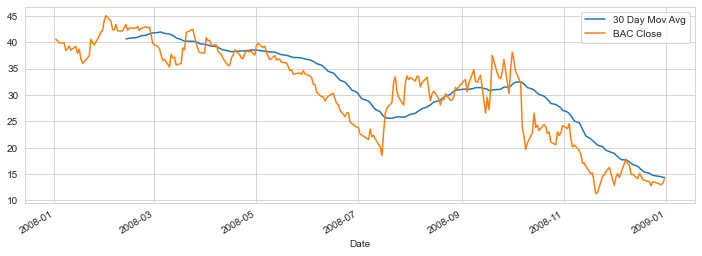

In [64]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label = '30 Day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

<b> Creating a heatmap of the correlation between the stocks Close Price.</b>

In [66]:
bank_stocks.xs(key = 'Close', axis=1, level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

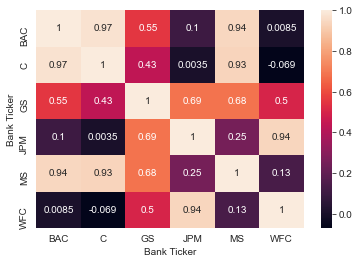

In [68]:
sns.heatmap(bank_stocks.xs(key = 'Close', axis=1, level='Stock Info').corr(), annot = True)

<b> Using seaborn's clustermap to cluster the correlations together: </b>

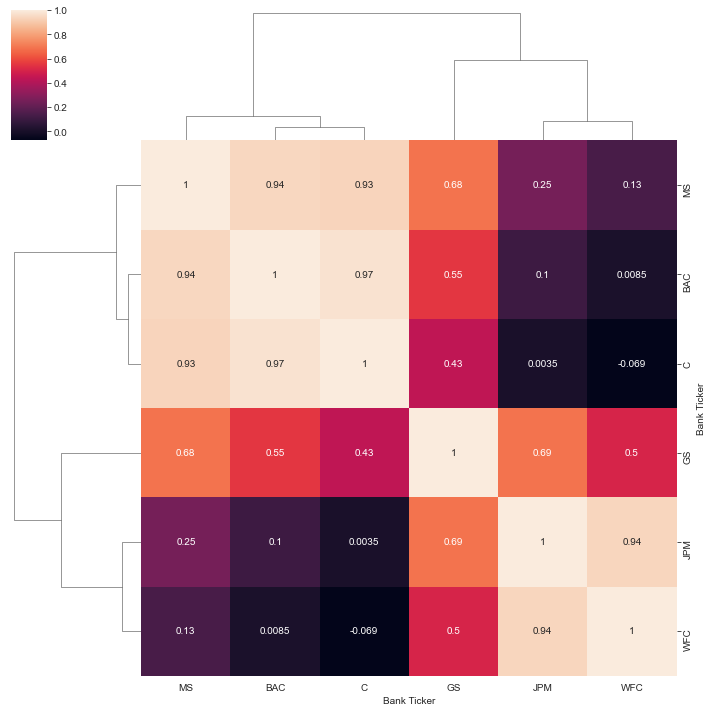

In [69]:
sns.clustermap(bank_stocks.xs(key = 'Close', axis=1, level='Stock Info').corr(), annot = True)

# Part 2 

In this second part of the project I will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project.

<b> Using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016. </b>

In [71]:
bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01']
bac15.iplot(kind = 'candle')

<b>Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015. </b>

In [72]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'sma', periods =[13,21,55])

<b>Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.</b>

In [73]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study = 'boll', periods =[13,21,55])